1.6575342465753424
1.1081081081081081
1.0
1.0
7.666666666666667
2.5714285714285716
1.0113636363636365
1.0
0.13043478260869565
0.04965753424657534
0.05690200210748156
0.48366701791359323
1.0
1.0
0.9949748743718593
2.618181818181818
0.9929577464788732
0.04952581664910432
1.6652173913043478
0.09902597402597403
1.0
1.0
7.461538461538462
2.5945945945945947
1.0
0.989247311827957
0.13402061855670103


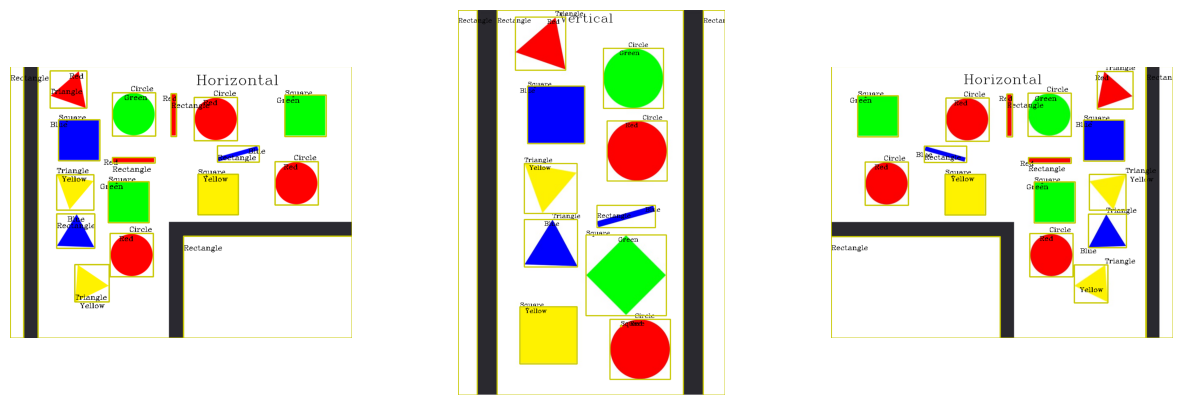

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
font = cv2.FONT_HERSHEY_COMPLEX
img_paths = ['test1.jpg', 'test2.jpg', 'test3.jpg']
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for k in range(len(img_paths)):
    img2 = cv2.imread(img_paths[k], cv2.IMREAD_COLOR)     # Image in colors
    img = cv2.imread(img_paths[k], cv2.IMREAD_GRAYSCALE)    # Image in gray
    newimg = cv2.resize(img2, (720, 720))           # Image After Resizing

    lowerpart = np.array([0, 0, 0])
    upperpart = np.array([50, 50, 50])
    maskD = cv2.inRange(newimg, lowerpart, upperpart)
    _, threshold = cv2.threshold(img, 240, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Detect Line Direction
    Leftimg = maskD[0:720, 0:340]        # Left Part of image
    Rightimg = maskD[0:720, 360:720]       # Right Part of image
    sobel_x = np.array([[-1, 0, 1],            # Sobelx for edge detection
                        [-2, 0, 2],
                        [-1, 0, 1]])
    Leftnew = cv2.filter2D(Leftimg, -1, sobel_x)          # Left part after applying sobelx
    Rightnew = cv2.filter2D(Rightimg, -1, sobel_x)         # Right part after applying sobelx

    for i in range(Leftimg.shape[0]):
        for j in range(Leftimg.shape[1]):
            if Leftnew[i, j] != 0:
                l = 1
                break
            else:
                l = 0

    for i in range(Rightimg.shape[0]):
        for j in range(Rightimg.shape[1]):
            if Rightnew[i, j] != 0:
                r = 1
                break
            else:
                r = 0

    if l == 0:
        cv2.putText(img2, "Horizontal", (300, 40), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 0))
    elif r == 0:
        cv2.putText(img2, "Horizontal", (400, 40), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 0))
    else:
        cv2.putText(img2, "Vertical", (250, 30), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 0))
    #Detect Green Yellow
    lowery=np.array([15,150,20])
    uppery=np.array([35,255,255])
    hsvy=cv2.cvtColor(img2,cv2.COLOR_BGR2HSV)
    masky=cv2.inRange(hsvy,lowery,uppery)
    contrsy,hiearchyY=cv2.findContours(masky,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    if len(contrsy)!=0:
        for contr in contrsy:
            approx=cv2.approxPolyDP(contr,0.01*cv2.arcLength(contr,True),True)
            x=approx.ravel()[0]
            y=approx.ravel()[1]-4
            if cv2.contourArea(contr)>500:
                cv2.putText(img2,"Yellow",(x+10,y+18),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,0))

    #Detect Green Blue
    lowerb=np.array([94,80,2])
    upperb=np.array([126,255,255])
    hsvb=cv2.cvtColor(img2,cv2.COLOR_BGR2HSV)
    maskb=cv2.inRange(hsvb,lowerb,upperb)
    contrsb,hiearchyB=cv2.findContours(maskb,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    if len(contrsb)!=0:
        for cont in contrsb:
            approx=cv2.approxPolyDP(cont,0.01*cv2.arcLength(cont,True),True)
            x=approx.ravel()[0]
            y=approx.ravel()[1]-4
            if cv2.contourArea(cont)>500:
                cv2.putText(img2,"Blue",(x-20,y+18),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,0))

    #Detect Green Red

    lowerr=np.array([0,150,50])
    upperr=np.array([10,255,255])
    hsvr=cv2.cvtColor(img2,cv2.COLOR_BGR2HSV)
    maskr=cv2.inRange(hsvr,lowerr,upperr)
    contrsr,hiearchyR=cv2.findContours(maskr,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    if len(contrsr)!=0:
        for con in contrsr:
            approx=cv2.approxPolyDP(con,0.01*cv2.arcLength(con,True),True)
            x=approx.ravel()[0]
            y=approx.ravel()[1]-4
            if cv2.contourArea(con)>500:
                cv2.putText(img2,"Red",(x-20,y+18),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,0))
    #Detect Green Color
    lowerg=np.array([35,150,50])
    upperg=np.array([75,255,255])
    hsvg=cv2.cvtColor(img2,cv2.COLOR_BGR2HSV)
    maskg=cv2.inRange(hsvg,lowerg,upperg)
    contrsg,hiearchG=cv2.findContours(maskg,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    if len(contrsg)!=0:
        for con in contrsg:
            approx=cv2.approxPolyDP(con,0.01*cv2.arcLength(con,True),True)
            x=approx.ravel()[0]
            y=approx.ravel()[1]-4
            if cv2.contourArea(con)>500:
                cv2.putText(img2,"Green",(x-20,y+18),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,0))

    # Detect Shapes
    for contour in contours:
        approx=cv2.approxPolyDP(contour,0.01*cv2.arcLength(contour,True),True)
        x=approx.ravel()[0]
        y=approx.ravel()[1]-4
        if (len(approx)==3):
            cv2.putText(img2,"Triangle",(x,y),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,0))
        elif (len(approx)==4 or len(approx)==5):
            x,y,w,h=cv2.boundingRect(approx)
            aspectratio=float(w)/h
            print(aspectratio)
            if aspectratio >=0.95 and aspectratio<=1.05:
                cv2.putText(img2,"Square",(x,y),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,0))
            else:

                cv2.putText(img2,"Rectangle",(x,y+30),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,0))

        else:
            cv2.putText(img2,"Circle",(x,y),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,0))

        x, y, w, h = cv2.boundingRect(approx)
        cv2.rectangle(img2, (x, y), (x + w, y + h), (0, 200, 200), 2)
    axs[k].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    axs[k].axis('off')

plt.show()

COMMENt

